# Astrophysics Laboratory: Data analysis - Stellar clusters
## M39 Data:

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Matplotlib style ;)
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

# Reset matplotlib style
# plt.rcParams.update(plt.rcParamsDefault)

### Master bias creation

Verification: biasFiles = ['bias_good_2023-09-21_19-10-28_0023.fits', 'bias_good_2023-09-21_19-10-30_0024.fits', 'bias_good_2023-09-21_19-10-33_0025.fits', 'bias_good_2023-09-21_19-10-35_0026.fits', 'bias_good_2023-09-21_19-10-38_0027.fits', 'bias_good_2023-09-21_19-10-40_0028.fits', 'bias_good_2023-09-21_19-10-43_0029.fits', 'bias_good_2023-09-21_19-10-45_0030.fits', 'bias_good_2023-09-21_19-10-48_0031.fits', 'bias_good_2023-09-21_19-10-50_0032.fits', 'bias_good_2023-09-21_19-10-53_0033.fits', 'bias_good_2023-09-21_19-10-55_0034.fits', 'bias_good_2023-09-21_19-10-58_0035.fits', 'bias_good_2023-09-21_19-11-00_0036.fits', 'bias_good_2023-09-21_19-11-02_0037.fits', 'bias_good_2023-09-21_19-11-05_0038.fits', 'bias_good_2023-09-21_19-11-07_0039.fits', 'bias_good_2023-09-21_19-11-10_0040.fits', 'bias_good_2023-09-21_19-11-12_0041.fits', 'bias_good_2023-09-21_19-11-15_0042.fits', 'bias_good_2023-09-21_19-11-17_0043.fits', 'bias_good_2023-09-21_19-11-20_0044.fits', 'bias_good_2023-09-21_19-11

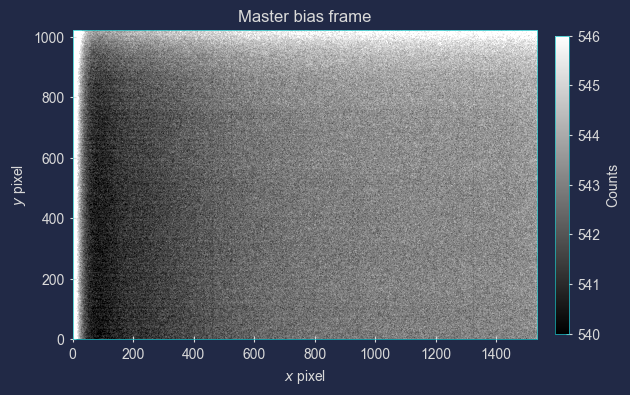

In [2]:
# Storage directory
dir = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/20230921_M39_Day/"

# Reading bias files
biasFiles, fitsAll, biasAll = [], [], []
for file_n in os.listdir(dir):
     if "bias" in file_n: biasFiles.append(file_n)
    
# Some of the bias frames are not good. We will remove them.
d = 2
biasFiles = biasFiles[d:]

print(f"Verification: biasFiles = {biasFiles}")
for file_n in biasFiles:
    fitsAll.append(fits.open(dir + file_n))
    biasAll.append(fitsAll[-1][0].data)

# I think this is better. I don't think we should normalize here.
biasAllNormalized = np.asarray([biasAll[i] for i in range(len(biasAll))])

# Stacking bias files. Criteria: median.
masterBias = np.median(biasAllNormalized, axis = 0)
print(f'Shape tests: {np.shape(biasAllNormalized)}, {np.shape(masterBias)}')
print(f'Normalized median (test) = {np.median(masterBias)}')

# Plot the resulting master bias frame.
lo, up = np.percentile(masterBias, 5), np.percentile(masterBias, 95)
plt.figure()
plt.title('Master bias frame')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(masterBias, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

# Save image, as a FITS file.
fits.writeto('../M39_Day_Calibration/MasterBias.fits', masterBias, fitsAll[0][0].header, overwrite = True) # Using fitsAll[0]'s header as header.

### Master flat (Red, Green, Blue) creation

Creating master flat (Red) frame...
Verification (4 files read): flatRedFiles = ['flat_2023-09-21_19-42-40_Red_0073.fits', 'flat_2023-09-21_19-44-56_Red_0074.fits', 'flat_2023-09-21_19-46-29_Red_0075.fits', 'flat_2023-09-21_19-48-01_Red_0076.fits']
Shape tests: Before stacking = (4, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 0.9993220532588007


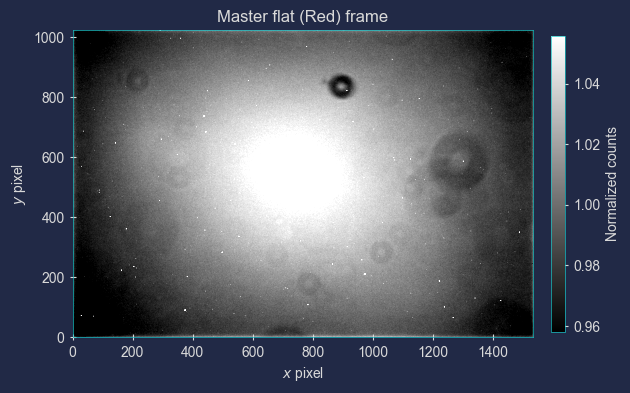

Master flat (Red) frame saved as FITS file.

Creating master flat (Green) frame...
Verification (5 files read): flatGreenFiles = ['flat_2023-09-21_19-28-21_Green_0067.fits', 'flat_2023-09-21_19-29-54_Green_0068.fits', 'flat_2023-09-21_19-31-27_Green_0069.fits', 'flat_2023-09-21_19-32-59_Green_0070.fits', 'flat_2023-09-21_19-34-32_Green_0071.fits']
Shape tests: Before stacking = (5, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 0.9994821336095288


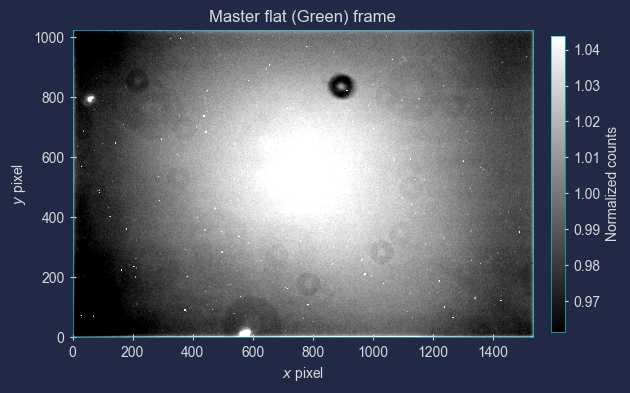

Master flat (Green) frame saved as FITS file.

Creating master flat (Blue) frame...
Verification (9 files read): flatBlueFiles = ['flat_2023-09-21_19-20-36_Blue_0057.fits', 'flat_2023-09-21_19-20-53_Blue_0058.fits', 'flat_2023-09-21_19-21-11_Blue_0059.fits', 'flat_2023-09-21_19-21-28_Blue_0060.fits', 'flat_2023-09-21_19-21-46_Blue_0061.fits', 'flat_2023-09-21_19-22-04_Blue_0062.fits', 'flat_2023-09-21_19-22-21_Blue_0063.fits', 'flat_2023-09-21_19-22-39_Blue_0064.fits', 'flat_2023-09-21_19-22-57_Blue_0065.fits']
Shape tests: Before stacking = (9, 1024, 1536); After stacking = (1024, 1536)
Normalized median (test) = 1.0


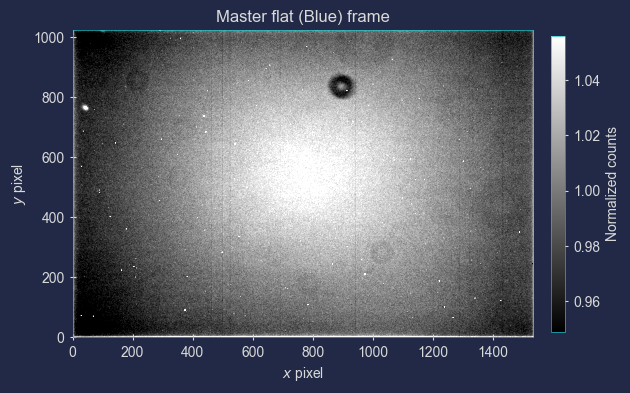

Master flat (Blue) frame saved as FITS file.


In [3]:
def masterFlatCreator(filter: str, plot_flag: bool) -> None:
    """
    Description:
        Creates a master flat frame for a given filter.
    Args:
        filter (str): filter of the flat frames to be used. Input should be 'Red', 'Green' or 'Blue'.
        plot_flag (bool): if True, plots the resulting master flat frame.
    Outputs:
        None.
    """

    # Status message.
    print(f'Creating master flat ({filter}) frame...')

    # Reading flat files, for filter X.
    flatX_Files, fits_All, flatX_All = [], [], []
    for file_n in os.listdir(dir):
         if ("flat" in file_n and f"{filter}" in file_n): flatX_Files.append(file_n)

    # Some of the flat frames are not good. We will remove them.
    if(filter == "Green"):  d = 1
    elif(filter == "Blue"): d = 3
    elif(filter == "Red"):  d = 1
    flatX_Files = flatX_Files[d:]

    print(f"Verification ({len(flatX_Files)} files read): flat{filter}Files = {flatX_Files}")
    for file_n in flatX_Files:
        fits_All.append(fits.open(dir + file_n))
        flatX_All.append(fits_All[-1][0].data)
    
    # Subtracting master bias from flatX files AND normalizing afterwards. Criteria: median.
    flatX_All_Normalized = np.asarray([(flatX_All[i] - masterBias)/np.median(flatX_All[i] - masterBias) for i in range(len(flatX_All))])
    
    # Stacking flatX files. Criteria: median.
    masterFlatX = np.median(flatX_All_Normalized, axis = 0)
    
    print(f'Shape tests: Before stacking = {np.shape(flatX_All_Normalized)}; After stacking = {np.shape(masterFlatX)}')
    print(f'Normalized median (test) = {np.median(masterFlatX)}')
    
    if(plot_flag == True):
        # Plot the resulting master flatX frame.
        lo, up = np.percentile(masterFlatX, 5), np.percentile(masterFlatX, 95)
        plt.figure()
        plt.title(f'Master flat ({filter}) frame')
        plt.xlabel(r'$x$ pixel')
        plt.ylabel(r'$y$ pixel')
        plt.imshow(masterFlatX, cmap = 'gray', clim = (lo, up), origin = 'lower')
        plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Normalized counts')
        plt.tight_layout()
        plt.grid(False)
        plt.show()
    
    # Save image as a FITS file.
    fits.writeto(f'../M39_Day_Calibration/MasterFlat{filter}.fits', masterFlatX, fits_All[0][0].header, overwrite = True) # Using fitsAll[0]'s header as header.
    print(f'Master flat ({filter}) frame saved as FITS file.')

# Creating master flat frames for each filter.
masterFlatCreator('Red', True); print()
masterFlatCreator('Green', True); print()
masterFlatCreator('Blue', True)
    

### Image calibration
Data:
- For Red filter:   124 - 129: Science (20 sec. exposures);
- For Green filter: 118 - 123: Science (20 sec. exposures);
- For Blue filter:  108 - 117: Science (60 sec. exposures).

In [4]:
def generateCalibratedFrames(filter: str) -> None:
    """
    Description:
        Generates calibrated images for a given filter, aka, subtracts master bias and divides by master flat.
    Args:
        filter (str): filter of the light frames to be used. Input should be 'Red', 'Green' or 'Blue'.
    Outputs:
        calibrated images (FITS files).
    """

    masterBias = fits.open('../M39_Day_Calibration/MasterBias.fits')[0].data

    # Reading created master flat files. 
    if(filter == "Green"):  masterFlat = fits.open('../M39_Day_Calibration/MasterFlatGreen.fits')[0].data; print("Generating Green..."); d = 6
    elif(filter == "Blue"): masterFlat = fits.open('../M39_Day_Calibration/MasterFlatBlue.fits')[0].data; print("Generating Blue...");   d = 10
    elif(filter == "Red"):  masterFlat = fits.open('../M39_Day_Calibration/MasterFlatRed.fits')[0].data; print("Generating Red...");     d = 6

    # Storage directory
    dir_Images = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/20230921_M39_Day/"

    # Reading light f'{filter}' files
    light_X_Files, light_X_All, header_g_All = [], [], []
    for file_n in os.listdir(dir_Images):
         if ("m39" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
    light_X_Files = light_X_Files[:d]
    print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
    for file_n in light_X_Files:
        light_X_All.append(fits.open(dir_Images + file_n)[0].data)
        header_g_All.append(fits.open(dir_Images + file_n)[0].header)

    # Correction with bias and flat.
    light_X_All_corrected = (light_X_All - masterBias)/masterFlat

    for n, frame in enumerate(light_X_All_corrected):
        fits.writeto(f'C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/{light_X_Files[n]}', frame, header_g_All[n], overwrite = True)

# Generating calibrated images.
generateCalibratedFrames("Red")
generateCalibratedFrames("Green")
generateCalibratedFrames("Blue")

Generating Red...
Verification (6 files read): lightRedFiles = ['m39_2023-09-21_21-04-54_Red_0124.fits', 'm39_2023-09-21_21-06-12_Red_0125.fits', 'm39_2023-09-21_21-07-15_Red_0126.fits', 'm39_2023-09-21_21-08-08_Red_0127.fits', 'm39_2023-09-21_21-10-05_Red_0128.fits', 'm39_2023-09-21_21-11-09_Red_0129.fits']
Generating Green...
Verification (6 files read): lightGreenFiles = ['m39_2023-09-21_20-59-48_Green_0118.fits', 'm39_2023-09-21_21-01-35_Green_0119.fits', 'm39_2023-09-21_21-01-58_Green_0120.fits', 'm39_2023-09-21_21-02-21_Green_0121.fits', 'm39_2023-09-21_21-02-43_Green_0122.fits', 'm39_2023-09-21_21-03-06_Green_0123.fits']
Generating Blue...
Verification (10 files read): lightBlueFiles = ['m39_2023-09-21_20-40-18_Blue_0108.fits', 'm39_2023-09-21_20-42-39_Blue_0109.fits', 'm39_2023-09-21_20-43-42_Blue_0110.fits', 'm39_2023-09-21_20-44-45_Blue_0111.fits', 'm39_2023-09-21_20-45-47_Blue_0112.fits', 'm39_2023-09-21_20-46-50_Blue_0113.fits', 'm39_2023-09-21_20-47-53_Blue_0114.fits', 'm3

Alignment using `astroalign`:

In [8]:
import astroalign as aa

dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/"
files = []; filter = 'Blue'
for file_n in os.listdir(dir_Light):
     if ("m39" in file_n and f"{filter}" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image, detection_sigma = 1)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('../M39_Calibrated/Alignment/' + aligned_file + '_AlignedColour' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['m39_2023-09-21_20-40-18_Blue_0108.fits', 'm39_2023-09-21_20-42-39_Blue_0109.fits', 'm39_2023-09-21_20-43-42_Blue_0110.fits', 'm39_2023-09-21_20-44-45_Blue_0111.fits', 'm39_2023-09-21_20-45-47_Blue_0112.fits', 'm39_2023-09-21_20-46-50_Blue_0113.fits', 'm39_2023-09-21_20-47-53_Blue_0114.fits', 'm39_2023-09-21_20-48-55_Blue_0115.fits', 'm39_2023-09-21_20-49-58_Blue_0116.fits', 'm39_2023-09-21_20-51-01_Blue_0117.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.
No. 3 alignment done.
No. 4 alignment done.
No. 5 alignment done.
No. 6 alignment done.
No. 7 alignment done.
No. 8 alignment done.
No. 9 alignment done.


### Stacking light frames:

Verification (6 files read): lightGreenFiles = ['m39_2023-09-21_20-59-48_Green_0118_AlignedColour.fits', 'm39_2023-09-21_21-01-35_Green_0119_AlignedColour.fits', 'm39_2023-09-21_21-01-58_Green_0120_AlignedColour.fits', 'm39_2023-09-21_21-02-21_Green_0121_AlignedColour.fits', 'm39_2023-09-21_21-02-43_Green_0122_AlignedColour.fits', 'm39_2023-09-21_21-03-06_Green_0123_AlignedColour.fits']


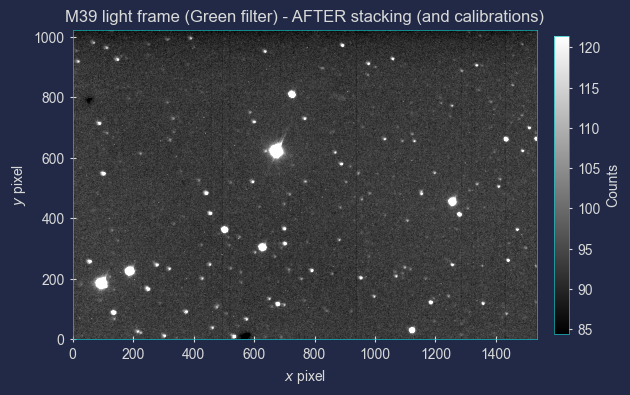

In [11]:
# Storage directory
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/"
filter = "Green" # Red, Green or Blue. Change this to change the filter.

# Reading light f'{filter}' files
light_X_Files, light_X_All, header_g_All = [], [], []
for file_n in os.listdir(dir_Light):
     if ("m39" in file_n and f"{filter}" in file_n): light_X_Files.append(file_n)
print(f"Verification ({len(light_X_Files)} files read): light{filter}Files = {light_X_Files}")
for file_n in light_X_Files:
    light_X_All.append(fits.open(dir_Light + file_n)[0].data)
    header_g_All.append(fits.open(dir_Light + file_n)[0].header)

lightBlue_Stack = np.median(light_X_All, axis = 0) # Sum or median here? Median looks better.
                                                   # Should sum be better? Because we want to have more counts?
fits.writeto('../M39_Calibrated/Alignment/' + filter + '_Stacked' + '.fits', lightBlue_Stack, header_g_All[0], overwrite = True)

# Test plot: AFTER stacking.
lo, up = np.percentile(lightBlue_Stack, 1.5), np.percentile(lightBlue_Stack, 99.5)
plt.figure()
plt.title(f'M39 light frame ({filter} filter) - AFTER stacking (and calibrations)')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.imshow(lightBlue_Stack, cmap = 'gray', clim = (lo, up), origin = 'lower')
plt.colorbar(fraction = 0.030, pad = 0.035, label = 'Counts')
plt.tight_layout()
plt.grid(False)
plt.show()

Now, aligning the three master light frames (R, G, B):

In [12]:
dir_Light = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/"
files = []
for file_n in os.listdir(dir_Light):
     if ("Stacked" in file_n): files.append(file_n)
print(files)

reference_image = fits.open(dir_Light + files[0])[0].data + 0
for i in range(0, len(files)):
    image_data = fits.open(dir_Light + files[i])
    source_image = image_data[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
    header = image_data[0].header
    image_aligned, footprint = aa.register(source_image, reference_image)
    aligned_file = files[i].replace('.fits', '')
    fits.writeto('../M39_Calibrated/Alignment//' + aligned_file + '_aligned' + '.fits', image_aligned, header, overwrite = True)
    print('No. %i alignment done.' %i)

['Blue_Stacked.fits', 'Green_Stacked.fits', 'Red_Stacked.fits']
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.


### RGB colour composite image attempt:
This fails because the images are:
- 1: Not calibrated; (Now they are!)
- 2: Not aligned. (I think it's good now)

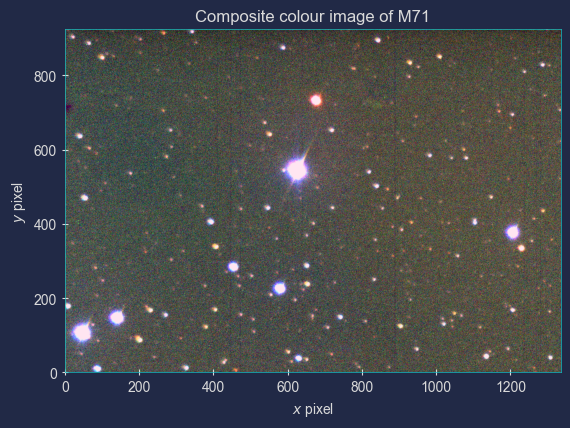

In [13]:
from astropy.visualization import make_lupton_rgb, PowerStretch, ZScaleInterval

forCasting = np.float_()

# Read the three images. Need to interpret as 'float', otherwise 'make_lupton_rgb' complains.
r = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/Red_Stacked_aligned.fits'  )[0].data
g = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/Green_Stacked_aligned.fits')[0].data
b = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/Blue_Stacked_aligned.fits' )[0].data

# Crop the top and the right margin (contains black pixels, from the alignment process)
r = r[50:-50, 100:-100]
g = g[50:-50, 100:-100]
b = b[50:-50, 100:-100]

# Casting to float
r = np.array(r, forCasting)
g = np.array(g, forCasting)
b = np.array(b, forCasting)

stretch = PowerStretch(a = 1) + ZScaleInterval() # PowerStretch (a = 1) is a linear stretch.

r = stretch(r)
g = stretch(g)/1.10 # Random factors to make the image look prettier ;)
b = stretch(b)/1.05

# Plot RGB individually/separately, if you want to.
# plt.imshow(r, cmap = "Reds", origin = 'lower')
# plt.imshow(g, cmap = "Greens", origin = 'lower')
# plt.imshow(b, cmap = "Blues", origin = 'lower')

lo_val, up_val = np.percentile(np.hstack((r.flatten(), g.flatten(), b.flatten())), (0.5, 99.5))  # Get the value of lower and upper 0.5% of all pixels
stretch_val = up_val - lo_val
rgb_default = make_lupton_rgb(r, g, b, minimum = lo_val, Q = 0, stretch = stretch_val, filename = "M39-Default.jpeg")

# Cut the top rows - contains black pixels
# rgb_default = rgb_default[50:-50, 100:-100, :]

plt.imshow(rgb_default, origin = 'lower')
plt.title('Composite colour image of M71')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.savefig('M39_CompositeRGB.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Star finder procedure

Found 224 stars in image.


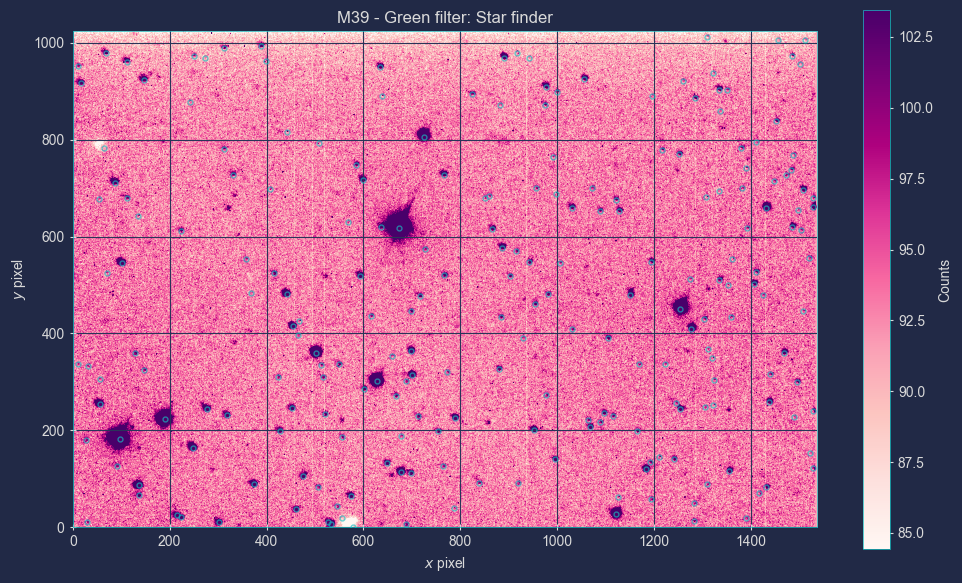

In [40]:
# Find stars in the field
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats, gaussian_sigma_to_fwhm

dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/M39_Calibrated/Alignment/"
Green_frame = "Green_Stacked.fits"
data_g = fits.open(dir_Light + Green_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.5 * std)  # 'peakmax' to exclude saturated stars!  
sources = daofind(data_g - median)
print("Found %i stars in image." %len(sources))

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("M39 - Green filter: Star finder")
l1 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 1.5)
l2 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 98.5)
plt.imshow(data_g, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(sources["xcentroid"], sources["ycentroid"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.65)
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.show()